In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gamma
from scipy.stats import norm
import pandas as pd
import math

### Task 1: Empirical vs. Theoretical PMF for Dice Sums

(a) Simulate N=10,000 independent trials of rolling two fair dice; form W = X + Y .

In [3]:
slots = 10000
x = np.random.randint(1, 7, slots)
y = np.random.randint(1, 7, slots)

w = x + y



(b) Compute the empirical PMF of W on {2, . . . , 12}.

In [4]:
empirical_pmf = {}

for i in range(2, 13):
    value_count = np.sum(w == i)
    prob = value_count/slots
    empirical_pmf[i] = prob

#Check if the sum of all probabilities add up to 1 for the PMF to be valid

print(f'Sum of probabilities: {sum(empirical_pmf.values())}')

Sum of probabilities: 1.0


(c) Compute the theoretical PMF by enumerating all 36 outcomes.

In [ ]:
outcomes = np.zeros((6, 6), dtype=int)

for i in range(6):      
    for j in range(6):  
        outcomes[i][j] = (i + 1) + (j + 1)

print(outcomes)

[[ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]]


In [6]:
theoretical_pmf = {}

for i in range(2, 13):
    value_count = np.sum(outcomes == i)
    prob = value_count/36
    theoretical_pmf[i] = prob

#Check if the sum of all probabilities add up to 1 for the PMF to be valid
print(f'Sum of probabilities: {sum(theoretical_pmf.values())}')

Sum of probabilities: 1.0000000000000002


(d) Figure 1: Bar plot of the empirical PMF with the theoretical PMF overlaid (markers/line)

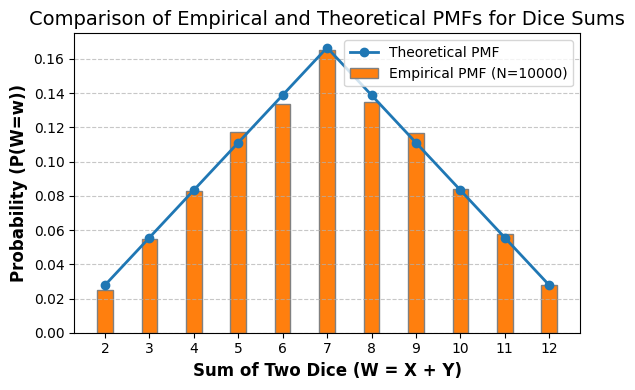

In [38]:
sum_values = np.array(list(theoretical_pmf.keys()))
P_theoretical = np.array(list(theoretical_pmf.values()))
P_empirical = np.array(list(empirical_pmf.values()))

bar_width = 0.35
r2 = sum_values  

fig, ax = plt.subplots(figsize=(6, 4))

ax.bar(r2, P_empirical, color='#ff7f0e', width=bar_width, edgecolor='grey', label=f'Empirical PMF (N={slots})')

ax.plot(sum_values, P_theoretical, color='#1f77b4', marker='o', linewidth=2, label='Theoretical PMF')

ax.set_xlabel('Sum of Two Dice (W = X + Y)', fontweight='bold', fontsize=12)
ax.set_ylabel('Probability (P(W=w))', fontweight='bold', fontsize=12)
ax.set_title('Comparison of Empirical and Theoretical PMFs for Dice Sums', fontsize=14)
ax.set_xticks(sum_values)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

(e) Short discussion

The agreement between empirical PMF and theoretical PMF is very strong, the empirical PMF closely matches the theoretical PMF which means that the process of rolling two dice N times and summing their outcomes truly follows the distribution predicted by discrete convolution.

The number of independent trials N is a key determinant on how close the empirical PMF is to the theoretical PMF. When N is small, say 100, the emprical PMF varies drastically from theoretical PMF, however when N is large (1,000,000), the empirical PMF becomes almost identical to the theoretical PMF 

### Task 2: Sum of Exponentials ⇒ Gamma

(a) For λ = 1 and n ∈ {1, 2, 5}, generate M=10,000 i.i.d. samples of Tn

In [8]:
def generate_exp_dist(number, lam, slots):
    sum_of_rv = 0
    for i in range(number):
        temp = np.random.exponential(1/lam, size=slots)
        sum_of_rv += temp
    
    return sum_of_rv

In [9]:
lam = 1
Y = np.random.exponential(1/lam, size=slots)

T1 = Y
T2 = generate_exp_dist(2, lam, slots)
T5 = generate_exp_dist(5, lam, slots)


(b) and (c) For each n, plot a normalized histogram and overlay Gamma(k=n, rate λ)

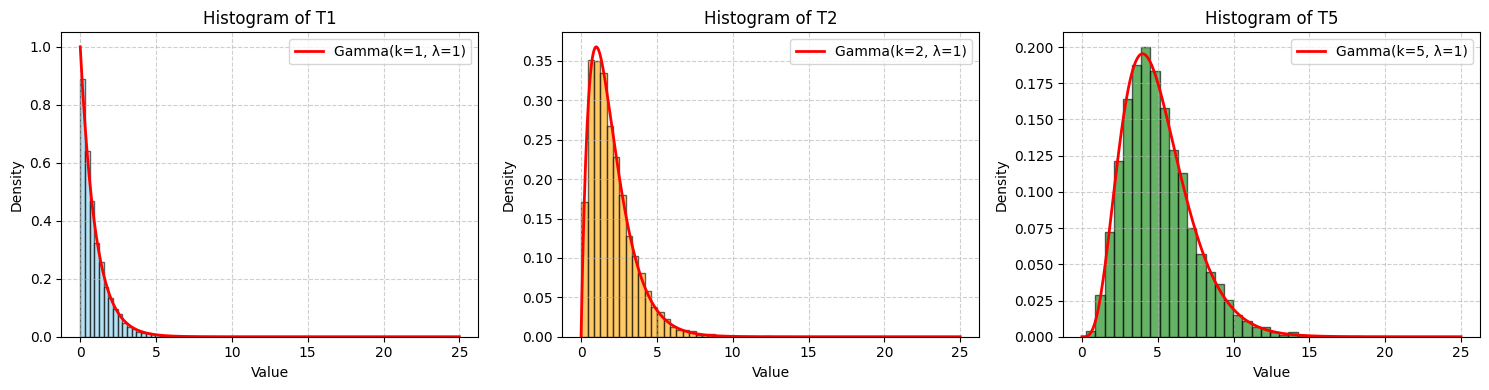

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 
x = np.linspace(0, 25, 500)

axes[0].hist(T1, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
axes[0].plot(x, gamma.pdf(x, a=1, scale=1/lam), 'r-', lw=2, label='Gamma(k=1, λ=1)')
axes[0].set_title('Histogram of T1')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)

axes[1].hist(T2, bins=30, density=True, alpha=0.6, color='orange', edgecolor='black')
axes[1].plot(x, gamma.pdf(x, a=2, scale=1/lam), 'r-', lw=2, label='Gamma(k=2, λ=1)')
axes[1].set_title('Histogram of T2')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

axes[2].hist(T5, bins=30, density=True, alpha=0.6, color='green', edgecolor='black')
axes[2].plot(x, gamma.pdf(x, a=5, scale=1/lam), 'r-', lw=2, label='Gamma(k=5, λ=1)')
axes[2].set_title('Histogram of T5')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Density')
axes[2].legend()
axes[2].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

(d) Table 1: Empirical and Theoretical Values

In [ ]:
# Empirical Means and Variances
e_mean_T1 = np.mean(T1)
e_var_T1 = np.var(T1)

e_mean_T2 = np.mean(T2)
e_var_T2 = np.var(T2)

e_mean_T5 = np.mean(T5)
e_var_T5 = np.var(T5)

# Theoreticl Means and Variances
t_mean_T1 = 1/lam
t_var_T1 = 1/(lam*lam)

t_mean_T2 = 2/lam
t_var_T2 = 2/(lam*lam)

t_mean_T5 = 5/lam
t_var_T5 = 5/(lam*lam)

data = {
    'Tn': ['T1', 'T2', 'T5'],
    'Empirical Mean': [e_mean_T1, e_mean_T2, e_mean_T5],
    'Theoretical Mean': [t_mean_T1, t_mean_T2, t_mean_T5],
    'Empirical Variance': [e_var_T1, e_var_T2, e_var_T5],
    'Theoretical Variance': [t_var_T1, t_var_T2, t_var_T5]
}

# Convert to DataFrame
df = pd.DataFrame(data)

df.head()

,Tn,Empirical Mean,Theoretical Mean,Empirical Variance,Theoretical Variance
0,T1,0.972391,1.0,0.956910,1.0
1,T2,2.011943,2.0,2.062538,2.0
2,T5,5.007130,5.0,5.060456,5.0


(e) Short discussion

**Concentrations:** consider the coefficient of variation = standard deviation/expected value
the coefficient of variation will be inversely proportional to the root of n. This means the distribution of Tn becomes more concentrated around its mean. The Law of Large Numbers says that the sum of i.i.d. random variables becomes more predictable as the number of terms grows.

**Gamma:** The Gamma distribution describes the total waiting time for n events, which is why it appears when we add up n exponential waiting times.

### Task 3: CLT Demonstration with Sample Means

(a) For n ∈ {1, 5, 30}, generate M=10,000 sample means Un where Ui ∼ Uniform(0, 1).

In [12]:
def generate_uniform_mean(number, slots):
    sum_of_rv = 0
    for i in range(number):
        temp = np.random.uniform(0, 1, slots)
        sum_of_rv += temp
    return sum_of_rv / number

In [13]:
U = np.random.uniform(0, 1, slots)
U1 = U
U5 = generate_uniform_mean(5, slots)
U30 = generate_uniform_mean(30, slots)


(b) and (c) For each n, plot a normalized histogram and overlay N(µ=0.5, σ2=1/(12n))

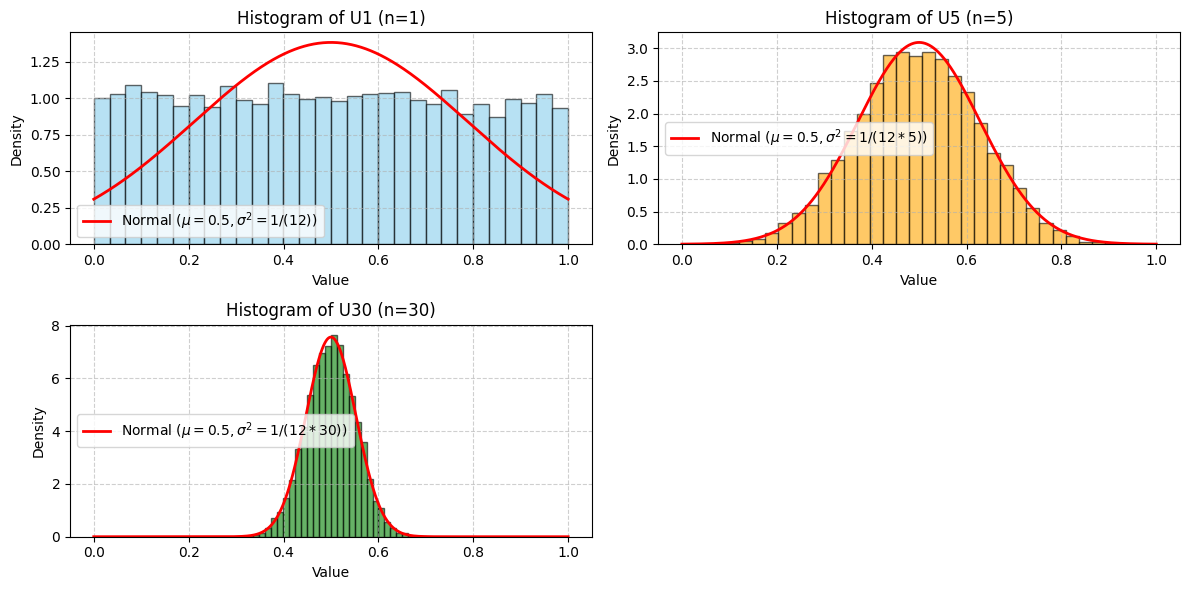

In [35]:
n_values = [1, 5, 30]

mu = 0.5 
variance_base = 1/12 
x = np.linspace(0, 1, 1000)

fig, axes = plt.subplots(2, 2, figsize=(12, 6)) 
axes = axes.flatten()  

# n = 1
n = n_values[0]
sigma = np.sqrt(variance_base / n)
pdf = norm.pdf(x, loc=mu, scale=sigma)

axes[0].hist(U1, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
axes[0].plot(x, pdf, 'r-', linewidth=2, label=r'Normal ($\mu=0.5, \sigma^2=1/(12)$)')
axes[0].set_title('Histogram of U1 (n=1)')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

# n = 5
n5 = n_values[1]
sigma = np.sqrt(variance_base / n5)
pdf5 = norm.pdf(x, loc=mu, scale=sigma)

axes[1].hist(U5, bins=30, density=True, alpha=0.6, color='orange', edgecolor='black')
axes[1].plot(x, pdf5, 'r-', linewidth=2, label=r'Normal ($\mu=0.5, \sigma^2=1/(12*5)$)')
axes[1].set_title('Histogram of U5 (n=5)')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

# n = 30
n30 = n_values[2]
sigma = np.sqrt(variance_base / n30)
pdf30 = norm.pdf(x, loc=mu, scale=sigma)

axes[2].hist(U30, bins=30, density=True, alpha=0.6, color='green', edgecolor='black')
axes[2].plot(x, pdf30, 'r-', linewidth=2, label=r'Normal ($\mu=0.5, \sigma^2=1/(12*30)$)')
axes[2].set_title('Histogram of U30 (n=30)')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Density')
axes[2].grid(True, linestyle='--', alpha=0.6)
axes[2].legend()

# hide the unused 4th subplot
axes[3].axis('off')

plt.tight_layout()
plt.show()

(d) Table 2: Empirical and Theoretical Values

In [37]:
# Empirical Means and Variances
e_mean_U1 = np.mean(U1)
e_var_U1 = np.var(U1)

e_mean_U5 = np.mean(U5)
e_var_U5 = np.var(U5)

e_mean_U30 = np.mean(U30)
e_var_U30 = np.var(U30)

# Theoreticl Means and Variances
t_mean_U1 = 0.5
t_var_U1 = 1/(12*1)

t_mean_U5 = 0.5
t_var_U5 = 1/(12*5)

t_mean_U30 = 0.5
t_var_U30 = 1/(12*30)

data = {
    'Un': ['U1', 'U5', 'U30'],
    'Empirical Mean': [e_mean_U1, e_mean_U5, e_mean_U30],
    'Theoretical Mean': [t_mean_U1, t_mean_U5, t_mean_U30],
    'Empirical Variance': [e_var_U1, e_var_U5, e_var_U30],
    'Theoretical Variance': [t_var_U1, t_var_U5, t_var_U30]
}

# Convert to DataFrame
df = pd.DataFrame(data)

df.head()

,Un,Empirical Mean,Theoretical Mean,Empirical Variance,Theoretical Variance
0,U1,0.493660,0.5,0.082705,0.083333
1,U5,0.498368,0.5,0.016376,0.016667
2,U30,0.500130,0.5,0.002730,0.002778


(e) Short discussion

**Convergence to Normality:** For n=1, the distribution closely resembles the original uniform distribution which is flat but as n increases, the distribution of the sum of means starts to take the familiar bell shape of the Normal distribution, regardless of the original distribution which is a normal flat distribution.

**Variance Effect:** As n increases, the histogram not only becomes bell-shaped but it also becomes tighter while concentrating around the mean. This means that The spread shrinks with 1/n as n increases.

### Task 4: Applied Aggregation — 30-Day Rainfall

(a) daily rainfall Ri ∼ Exponential(λ=0.5)

In [16]:
def sum_exp_dist(number, lam, slots):
    sum_of_rv = 0
    for i in range(number):
        temp = np.random.exponential(1/lam, size=slots)
        sum_of_rv += temp
    
    return sum_of_rv

R30 = sum_exp_dist(30, 0.5, slots)

(b) For thresholds τ ∈ {60, 70, 80}, estimation of P(R30 ≥ τ ) by simulation.

In [17]:
T = [60, 70, 80]
probabilities = np.zeros(3)

for i in range(len(T)):
    count = 0
    
    for j in range(slots):
        if R30[j] >= T[i]:
            count += 1
    
    probabilities[i] = count/slots
    

print(probabilities)

[0.4734 0.1725 0.0442]


(c) Using the CLT with Mean = 30/λ and Var = 30/(λ*λ) approximate P(R30 ≥ τ ):

In [18]:
mean = 30/0.5
var = 30/(0.5*0.5)

z_scores = np.zeros(3)

for i in range(len(T)):
    z_scores[i] = (T[i] - mean)/(np.sqrt(var))

clt_approximation = np.zeros(3)

for i in range(len(z_scores)):
    area = norm.cdf(z_scores[i])
    clt_approximation[i] = 1 - area

print(clt_approximation)

[0.5        0.18065521 0.03394458]


(d) Figure 4: Histogram of R30 with N(µ, σ2) density

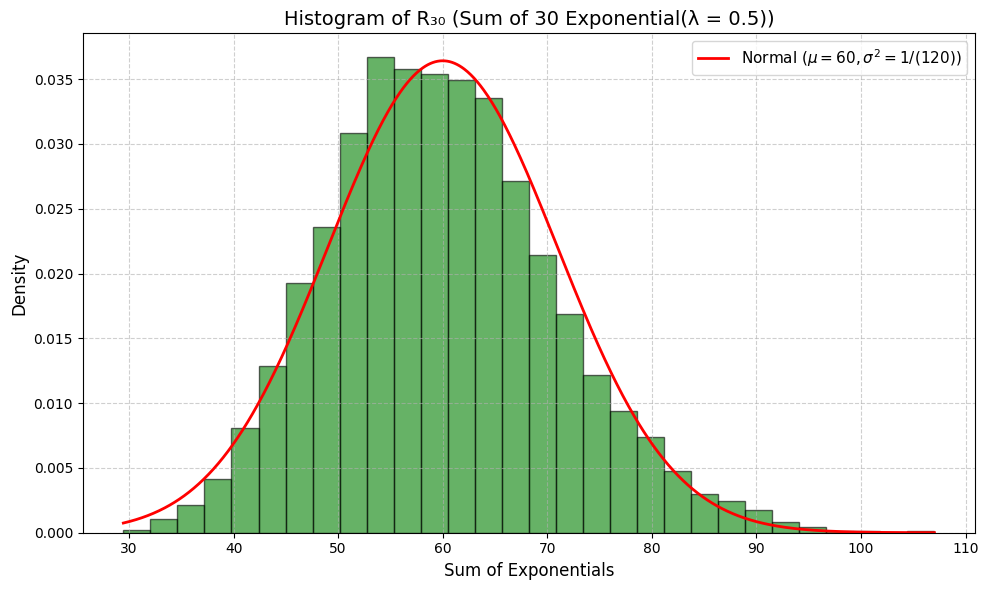

In [19]:
x = np.linspace(min(R30), max(R30), 1000)

fig, axes = plt.subplots(figsize=(10, 6))

n30 = n_values[2] 
sigma = np.sqrt(var) 
pdf30 = norm.pdf(x, loc=mean, scale=sigma) 

axes.hist(R30, bins=30, density=True, alpha=0.6, color='green', edgecolor='black')
axes.plot(x, pdf30, 'r-', linewidth=2, label=r'Normal ($\mu=60, \sigma^2=1/({120})$)') 
axes.set_title('Histogram of R₃₀ (Sum of 30 Exponential(λ = 0.5))', fontsize=14)
axes.set_xlabel('Sum of Exponentials', fontsize=12)
axes.set_ylabel('Density', fontsize=12)

axes.grid(True, linestyle='--', alpha=0.6)
axes.legend(fontsize=11)



plt.tight_layout()
plt.show()

(e) Table 3: For each τ , report Monte Carlo estimate, CLT approximation, and absolute error.

In [20]:
abs_error = np.abs(probabilities - clt_approximation)

# Create DataFrame
df = pd.DataFrame({
    "T": T,
    "Monte Carlo Estimate": probabilities,
    "CLT Approximation": clt_approximation,
    "Absolute Error": abs_error
})

df.head()

,T,Monte Carlo Estimate,CLT Approximation,Absolute Error
0,60,0.4734,0.500000,0.026600
1,70,0.1725,0.180655,0.008155
2,80,0.0442,0.033945,0.010255


(f) Short discussion

For sums of 30 exponential variables, the CLT provides a good approximation of the probability of exceeding a threshold. The Monte Carlo and CLT estimates are very close, with absolute errors generally below 0.03. Interestingly, the errors are slightly larger near the mean and smaller in the tails.

### Task 5: Comparing Markov, Chebyshev, and Chernoff Bounds

(a) Generate samples X1, . . . , Xn from N (0, 1) for n ranging from 1,000 to 100,000

In [21]:
n = [1000,10000,50000,100000]
x = []

for i in range(len(n)):
    snd = np.random.normal(0,1,n[i])
    x.append(snd)
print(len(x))

4


(b) For thresholds c ∈ [0.5, 3.0] (e.g., step 0.1), estimate p(c) 

In [22]:
c = np.arange(0.5, 3.0 + 0.1, 0.1)

prob_n_c = []
for i in range(len(x)):
    prob_n = []
    for j in range(c.shape[0]):
        count = 0
        for k in range(x[i].shape[0]):
            if x[i][k] > c[j]:
                count += 1
        prob = count/n[i]
        prob_n.append(prob)
    prob_n_c.append(prob_n)
    
print(prob_n_c)

[[0.337, 0.302, 0.272, 0.231, 0.204, 0.174, 0.149, 0.124, 0.104, 0.091, 0.072, 0.057, 0.049, 0.038, 0.031, 0.025, 0.018, 0.015, 0.013, 0.009, 0.006, 0.005, 0.004, 0.002, 0.002, 0.002], [0.3043, 0.2727, 0.2407, 0.2098, 0.1815, 0.1561, 0.132, 0.1103, 0.0926, 0.077, 0.0607, 0.0483, 0.0398, 0.0323, 0.0255, 0.0197, 0.0155, 0.0124, 0.01, 0.007, 0.0053, 0.0039, 0.0032, 0.0024, 0.0017, 0.0012], [0.30882, 0.27518, 0.24286, 0.2133, 0.18568, 0.15956, 0.13648, 0.1154, 0.09732, 0.0815, 0.06742, 0.05526, 0.04534, 0.03598, 0.02832, 0.0225, 0.01774, 0.01322, 0.01018, 0.00804, 0.00604, 0.00444, 0.00314, 0.00246, 0.00208, 0.00162], [0.30805, 0.27323, 0.241, 0.21075, 0.1839, 0.15936, 0.13602, 0.11599, 0.09804, 0.0812, 0.06682, 0.05461, 0.04447, 0.03567, 0.02837, 0.02278, 0.01764, 0.01378, 0.01083, 0.00819, 0.00615, 0.00474, 0.00344, 0.00259, 0.00191, 0.00146]]


(c) Compute three bounds for each c:

In [23]:
E_X_plus = []
for i in range(len(x)):
    x_plus = np.maximum(x[i], 0)
    E_X_plus.append(np.mean(x_plus))
    
print(len(E_X_plus))

4


In [24]:
markov_bound = []

for i in range(len(E_X_plus)):
    row = []
    for j in range(c.shape[0]):
        row.append(E_X_plus[i] / c[j])
    markov_bound.append(row)

markov_bound = np.array(markov_bound)
print(markov_bound)

[[0.86703831 0.72253193 0.61931308 0.54189895 0.48168795 0.43351916
  0.39410832 0.36126596 0.33347627 0.30965654 0.28901277 0.27094947
  0.25501127 0.24084398 0.22816798 0.21675958 0.20643769 0.19705416
  0.18848659 0.18063298 0.17340766 0.16673814 0.16056265 0.15482827
  0.14948936 0.14450639]
 [0.77966628 0.6497219  0.55690449 0.48729143 0.43314793 0.38983314
  0.35439376 0.32486095 0.29987165 0.27845224 0.25988876 0.24364571
  0.22931361 0.21657397 0.20517534 0.19491657 0.18563483 0.17719688
  0.16949267 0.16243048 0.15593326 0.14993582 0.14438264 0.13922612
  0.13442522 0.12994438]
 [0.79862824 0.66552353 0.57044874 0.49914265 0.44368236 0.39931412
  0.36301284 0.33276177 0.30716471 0.28522437 0.26620941 0.24957132
  0.23489066 0.22184118 0.21016533 0.19965706 0.19014958 0.18150642
  0.17361483 0.16638088 0.15972565 0.15358235 0.14789412 0.14261219
  0.13769452 0.13310471]
 [0.79755088 0.66462573 0.5696792  0.4984693  0.44308382 0.39877544
  0.36252313 0.33231287 0.30675034 0.2848

In [25]:
chebyshev_bound = []

for i in range(len(E_X_plus)):
    row = []
    for j in range(c.shape[0]):
        row.append(1/ (c[j]* c[j]))
    chebyshev_bound.append(row)

chebyshev_bound = np.array(chebyshev_bound)
print(chebyshev_bound)

[[4.         2.77777778 2.04081633 1.5625     1.2345679  1.
  0.82644628 0.69444444 0.59171598 0.51020408 0.44444444 0.390625
  0.34602076 0.30864198 0.27700831 0.25       0.22675737 0.20661157
  0.18903592 0.17361111 0.16       0.14792899 0.13717421 0.12755102
  0.11890606 0.11111111]
 [4.         2.77777778 2.04081633 1.5625     1.2345679  1.
  0.82644628 0.69444444 0.59171598 0.51020408 0.44444444 0.390625
  0.34602076 0.30864198 0.27700831 0.25       0.22675737 0.20661157
  0.18903592 0.17361111 0.16       0.14792899 0.13717421 0.12755102
  0.11890606 0.11111111]
 [4.         2.77777778 2.04081633 1.5625     1.2345679  1.
  0.82644628 0.69444444 0.59171598 0.51020408 0.44444444 0.390625
  0.34602076 0.30864198 0.27700831 0.25       0.22675737 0.20661157
  0.18903592 0.17361111 0.16       0.14792899 0.13717421 0.12755102
  0.11890606 0.11111111]
 [4.         2.77777778 2.04081633 1.5625     1.2345679  1.
  0.82644628 0.69444444 0.59171598 0.51020408 0.44444444 0.390625
  0.34602076 

In [26]:
chernof_bound = []

for i in range(len(E_X_plus)):
    row = []
    for j in range(c.shape[0]):
        c2 = math.exp(-(c[j]* c[j])/2)
        row.append(c2)
    chernof_bound.append(row)

chernof_bound = np.array(chernof_bound)
print(chernof_bound)

[[0.8824969  0.83527021 0.78270454 0.72614904 0.66697681 0.60653066
  0.54607443 0.48675226 0.42955736 0.3753111  0.32465247 0.2780373
  0.23574608 0.1978987  0.16447446 0.13533528 0.11025053 0.08892162
  0.07100535 0.05613476 0.04393693 0.03404745 0.02612141 0.01984109
  0.01492079 0.011109  ]
 [0.8824969  0.83527021 0.78270454 0.72614904 0.66697681 0.60653066
  0.54607443 0.48675226 0.42955736 0.3753111  0.32465247 0.2780373
  0.23574608 0.1978987  0.16447446 0.13533528 0.11025053 0.08892162
  0.07100535 0.05613476 0.04393693 0.03404745 0.02612141 0.01984109
  0.01492079 0.011109  ]
 [0.8824969  0.83527021 0.78270454 0.72614904 0.66697681 0.60653066
  0.54607443 0.48675226 0.42955736 0.3753111  0.32465247 0.2780373
  0.23574608 0.1978987  0.16447446 0.13533528 0.11025053 0.08892162
  0.07100535 0.05613476 0.04393693 0.03404745 0.02612141 0.01984109
  0.01492079 0.011109  ]
 [0.8824969  0.83527021 0.78270454 0.72614904 0.66697681 0.60653066
  0.54607443 0.48675226 0.42955736 0.3753111

(d) Figure 5: Plot p(c) and the three bounds vs. c on the same axes

In [27]:
df_list = []
for i in range(4):  # 4 sample sizes
    df_temp = pd.DataFrame({
        'c': c,
        'p(c)': prob_n_c[i],
        'Markov Bound': markov_bound[i],
        'Chebyshev Bound': chebyshev_bound[i],
        'Chernoff Bound': chernof_bound[i],
        'Sample Size': f'{n[i]}'
    })
    df_list.append(df_temp)

df_list[0].head()

,c,p(c),Markov Bound,Chebyshev Bound,Chernoff Bound,Sample Size
0,0.5,0.337,0.867038,4.000000,0.882497,1000
1,0.6,0.302,0.722532,2.777778,0.835270,1000
2,0.7,0.272,0.619313,2.040816,0.782705,1000
3,0.8,0.231,0.541899,1.562500,0.726149,1000
4,0.9,0.204,0.481688,1.234568,0.666977,1000


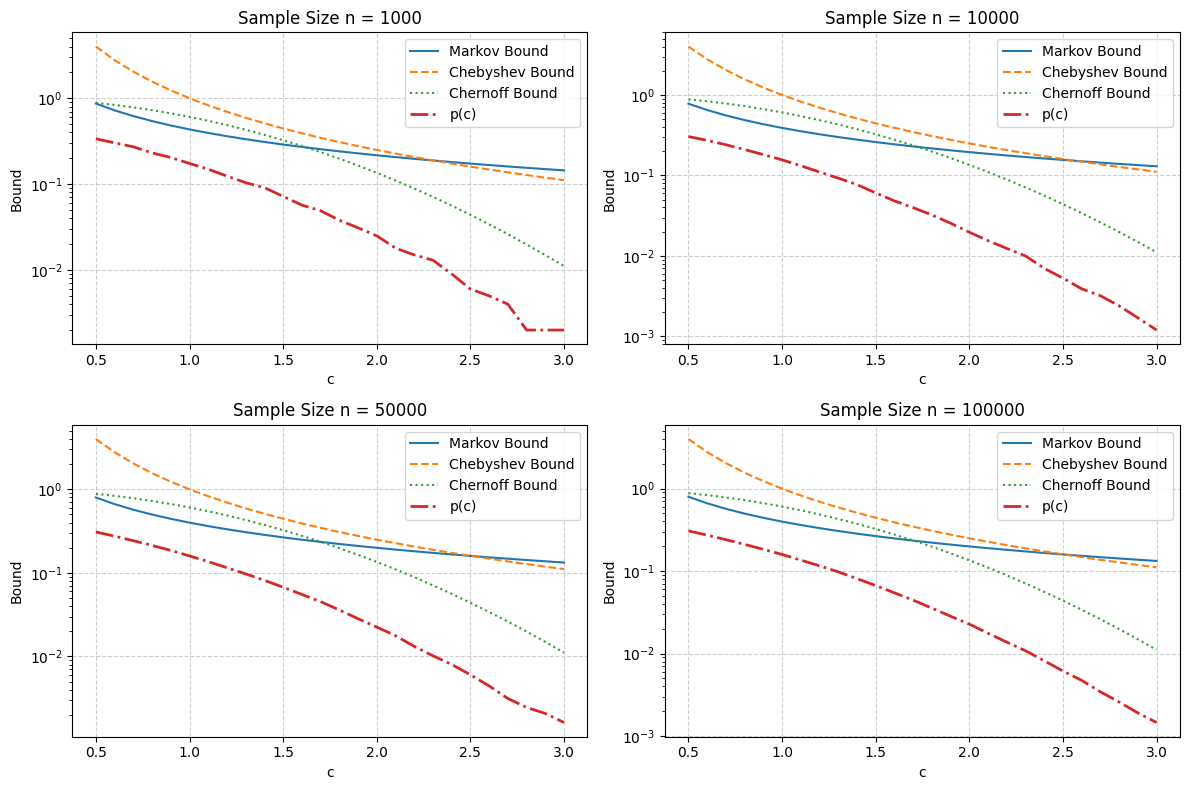

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i in range(4):
    df = df_list[i]
    
    axes[i].plot(df['c'], df['Markov Bound'], label='Markov Bound', linestyle='-', color='tab:blue')
    axes[i].plot(df['c'], df['Chebyshev Bound'], label='Chebyshev Bound', linestyle='--', color='tab:orange')
    axes[i].plot(df['c'], df['Chernoff Bound'], label='Chernoff Bound', linestyle=':', color='tab:green')
    axes[i].plot(df['c'], df['p(c)'], label='p(c)', linestyle='-.', color='tab:red', linewidth=2)
    
    axes[i].set_title(f'Sample Size n = {df["Sample Size"].iloc[0]}')
    axes[i].set_xlabel('c')
    axes[i].set_ylabel('Bound')
    axes[i].set_yscale('log')  
    axes[i].grid(True, linestyle='--', alpha=0.6)
    axes[i].legend()

plt.tight_layout()
plt.show()

(e) Short discussion

The Markov bound is the tightest for small values of c (0.5−1.0), The Chernof bound becomes tighter than the Markov bound for mid ranges of c (1.5-2.0) although the tightness of the chernoff bound is very close to that of the Markov bound and lastly, for values of c greater than 2 the Chernoff bound becomes the tightest by far.

Chebyshev’s bound only uses the variance and gives a tail bound that is a polinomial decay. The Chernoff bound on the other hand uses the moment generating function , which fully captures the exponential decay of Gaussian tails and as observed from the figures above the Chernoff bound matches the true tail behavior

larger n values clearly stabilize the estimated probability p(c). For n = 1000, p(c) shows noticeable fluctuation and noise, but as n increases to 100,000, the empirical probability curve smooths out and converges more reliably to the true underlying probability